$$\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}$$

# Medical Imaging

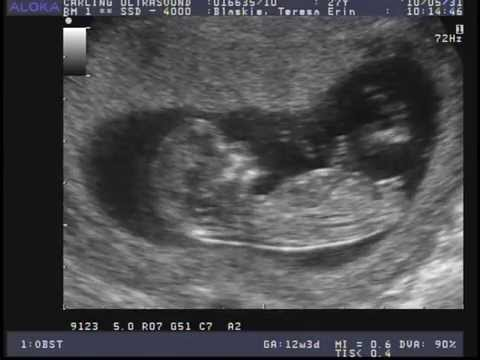

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("hH7FspvTI9I",width=800, height=600)

Modern ultrasonic scanners resemble personal computers with hard drives, internet connection and integrated peripheral devices. They are connected to ultrasonic probes.

<img src="images/picUSscanner.jpg" width=400> <p>
<a id='fig1'><center> Figure 8.1: Picture of a diagnostic ultrasound device.</center></a>


<img src="images/sketchUSscanner.png" width=600> <p>
<a id='fig2'><center> Figure 8.2: Ultrasound scanner with a) Monitor, b) Manual controls, c) several probes, d) backup on DVD, e) printer.</center></a>

<img src="images/blocksUSscanner.png" width=600> <p>
<a id='fig3'><center> Figure 8.3: Functional blocks of an US scanner</center></a>


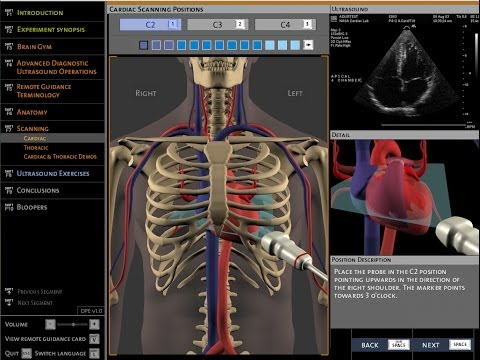

In [2]:
YouTubeVideo("JqVGgq5bE-Y",width=800, height=600)

## A-mode scanning

A single beam display methode, the A-mode where A stands for amplitude, is the simplest form of a scanner. The scanner receives the reflection from a single burst of ultrasound and displays it along a line on a display.

<img src="images/amode.png" width=400> <p>
<a id='fig2'><center> Figure 8.4: A-mode scanning of for an example an a) eye. b) radio frequency (RF) data, c) Hilbert transformed data b) Manual controls, c) several probes, d) backup on DVD, e) printer.</center></a>

Consider that the speed of sound in the medium is not changing we can relate the time axis with the depth axis $z$, e.g. 

\begin{equation}
d=\frac{c t}{2 PRF}
\end{equation}


$d$ is the maximum depth, $PRF$ the pulse repetition frequency, and the factor 2 comes from forth and back propagation of the beam. The most commonly used mean diagnostic ultrasound speed is $c=1540\,$m/s. Thus to increase the depth the $PRF$ has to be decreased.

Figure 8.4 depicts the steps in generating the A mode picture:

* (a) orientation of the US scan head
* (b) radio frequency data from the scan head
* (c) envelope of the RF calculated with the Hilbert transform (see code below)
* (d) time gain compensation (TGC) to account for geometrical and absorption losses.
* (e) A-mode diagram
* (f) 1-dimensional B-mode

The Hilbert transform allows to calculate the remove a fast oscillating frequency (the RF data) from a signal and keep the slowly varying envelope. Some information on the Hilbert transform is [given here](http://complextoreal.com/wp-content/uploads/2013/01/tcomplex.pdf) and an example code below.

Your turn:
* Study the program.
* Identify which signal is representing the RF data and which the depth signal
* Would higher carrier frequencies improve the A mode signal? Explain.

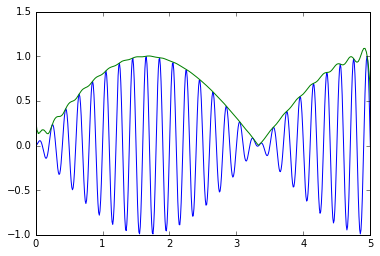

In [3]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig #this contains the Hilbert transform
from ipywidgets import widgets

def pltenvelope(f1,f2):
    t=np.linspace(0.,5.,500)
    y=np.sin(f1*t*np.pi)*np.sin(f2*t*np.pi)
    plt.plot(t,y)
    hilbert=np.imag(sig.hilbert(y))
    plt.plot(t,np.sqrt(y**2+hilbert**2));
    plt.show()

widgets.interact(pltenvelope,\
                 f1=widgets.FloatSlider(min=1.,max=20.,step=.25,value=10.,description='carrier frequency'),\
                 f2=widgets.FloatSlider(min=.1,max=1,step=.05,value=.3,description='modulation frequency'));


## B-mode scanning

If in the image the pixels are displayed with the brightness corresponding to the strength of the reflected signal we obtain the B-mode display where B stands for brightness. Here, the brightness is also adjusted with the TGC. Typically B mode images are 2d images where the azimuthal axis of the scan head is along the horizontal axis and the depth axis on the vertical.

<img src="images/gallbladderBmode.jpg" width=600> <p>
<a id='fig5'><center> Figure 8.5: B-mode image.</center></a>

Your turn:
* Try to identify object(s) which may cause some trouble in the B-mode scan in Fig. 8.5
* Estimate a typical frame rates for B-mode scanning


## M-mode scanning


In M-mode (M stands for motion) the echos from a single beam direction is displayed as a function of time on the horizontal. This has the advantage that at very high time resolution is achieved, up to 1kHz which allows to visualize the motion of a heart valves. 

<img src="images/sketchMmode.png" width=500> <p>
<a id='fig6'><center> Figure 8.6: Sketch of M-mode working principle.</center></a>

<img src="images/example mmode.jpg" width=600> <p>
<a id='fig7'><center> Figure 8.7: Example of the M-mode working principle.</center></a>



## Beamsteering

Figure 8.8 shows how we can obtain controlled steering of the beam by using six crystal elements during transmission with a short time delay between separate transmission pulses. A typical number of elements is 64.

<img src="images/beamsteering.png" width=500> <p>
<a id='fig8'><center> Figure 8.8: Electronic beamsteering with 6 elements.</center></a>

Figure 8.8a depicts a constant phase leading to a plane wave travelling normal to the scan head, while Fig. 8.8b introduces a fixed delay between neighboring transducers.

Your turn
* Design a scan head that has a single lobe within $\pm 30^\circ$ with 64 transducers operating at $4\,$MHz. What range of time delays to you need? What is the maximum framing rate in B-mode if you want to resolve 32 aximuthal lines and a depth of $100\,$mm.


## Examples of scan heads

<img src="images/USscanheads.png" width=500> <p>
<a id='fig9'><center> Figure 8.9: Scanheads a) linear array for 11MHz, b) curvelinear array at 4MHz, and 5MHz 1.5D matrix phase array.</center></a>


## Doppler Methods

If the sound source is emitting at a frequency $f$ is moving with a velocity $v_s$ towrads the audience at rest, the wavelength is reduced to 

\begin{equation}
\lambda'=\frac{c-v_s}{f}
\end{equation}

Hence the frequency measured is 

\begin{equation}
f'=\frac{f}{1-\frac{v_s}{c}}
\end{equation}

If the source moves away from the receiver $v_s$ is negative.

If the receiver is moving at a velocity $v_r$ towards the sound source, the frequency experienced is

\begin{equation}
f'=\frac{c+v_r}{\lambda}=\left(1+\frac{v_r}{c}\right) f
\end{equation}

The frequency detected from the US scan head for a scattering object moving relative to the scan head contains both contributions. The frequency shift $f_D=f'-f$ is called the Doppler shift. This can be btained from above equations as

\begin{equation}
f_D=\frac{2\frac{v}{c}\cos\Theta}{1-\frac{v}{c}\cos \Theta}\,f
\end{equation}

where v is the magnitude of the velocity of the blood, c is the speed sound, and $\Theta$ the angle between the US beam and the blood flow direction. Since $c\ll v$ 

\begin{equation}
f_D=2 \, f \,\frac{v}{c} \cos\Theta
\end{equation}

The doppler shift is positive if $f_D$ is towards the US probe and negative if it is away.

Below you can explore the dependency of the Doppler frequency from the angle $\Theta$ and the scanner frequency:

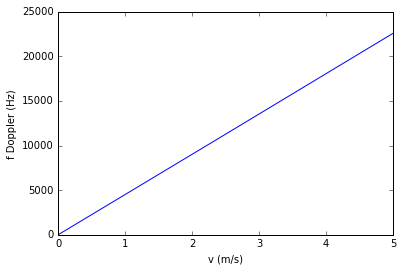

In [4]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

def pltdoppler(theta,f):
    f=f*1e6
    c=1540.
    v=np.linspace(0.,5.,500)
    vcos=v*np.cos(theta*np.pi/180.)
    vcosoc=vcos/c
    fd=2*vcosoc/(1-vcosoc)*f
    plt.plot(v,fd)
    plt.xlabel('v (m/s)')
    plt.ylabel('f Doppler (Hz)')
    plt.show()

widgets.interact(pltdoppler,\
                 theta=widgets.FloatSlider(min=0.,max=90,step=5,value=30.,description='Theta'),\
                 f=widgets.FloatSlider(min=.5,max=15,step=.5,value=4,description='frequency in MHz'));




### Single-beam Doppler methods
Here a the Doppler shift is registered from one Doppler beam. The Doppler signal is typically in the audible range and can be listen to via a loudspeaker.

<img src="images/sketchDoppler.png" width=500> <p>
<a id='fig10'><center> Figure 8.10: a) Continuous wave Doppler (CWD), b) pulsed wave Doppler (PWD), c) high pulse repetition frequency Doppler (HPRF).</center></a>

### Continuous wave Doppler

<img src="images/CWDoppler.jpg" width=500> <p>
<a id='fig11'><center> Figure 8.11: Continuous wave Doppler (CWD), note the measurement of high velocities of up to 4 m/s.</center></a>

In continuous wave Doppler (CDW) mode the transmit elements send a continuous ultrasound signal and a separate receiver element detects the reflected and Doppler shifted signal. The CWD mode is sensitive to the grayed area in Fig. 8.10 a).

### Pulsed wave Doppler

<img src="images/pulsedDoppler.jpg" width=500> <p>
<a id='fig12'><center> Figure 8.12: Pulsed wave Doppler (PWD).</center></a>

In pulsed wave Doppler (PWD) mode the transmitting and receiving elements are the same as used for example in B-mode imaging. A short pulse of about 6-12 cycles is transmitted with a pulse repetition frequency of 5-15kHz. The receiver is opened (gated) for a short time window to limit the sample volume, see Fig. 8.10. Because the frequency resolution is tight to the sampling frequency and the Doppler frequency is sampled with the PRF the maximum frequency which can be measured is

\begin{equation}
f_{D,max}=\frac{PRF}{2} \quad ,
\end{equation}

where the denominator is due to [Nyquist theorem](https://en.wikipedia.org/wiki/Nyquist–Shannon_sampling_theorem). 

The maximum PRF is related to the depth $R_{max}$ range the maximum velocity one can measure with PWD mode is

\begin{equation}
v_{max}=\frac{c^2}{8 f_0 R_{max}} \quad ,
\end{equation}

Your turn
* Derive above expression.

### High pulse repetition frequency Doppler (HPRF)

Here the next pulse is transmitted before the echoes from the first sample volume have been registered. Here the radiologist needs to be careful with the placement of the depth volume. Figure 8.10 c) depicts HPRF Doppler where only inside the artery the velocity is sampled. 

### Color Doppler 

With many sample volumes along the beam many Doppler scan line processor channels are needed in parallel. Sweeping the beam with multiple sample volumes gives velocity information in a 2D area. The mean velocity is the converted to a color code and overlayed on the grayscale B-mode image. This method is called color Doppler (CD). Typically the resolution for color Doppler is lower than for B-mode as a larger beam width (sample volume) is required for getting sufficient echoe strength from moving blood. Color Doppler may be affected already at normal arterial velocities from the Nyquist limit. 

<img src="images/colorDoppler.jpg" width=500> <p>
<a id='fig13'><center> Figure 8.13: Color Doppler of the liver.</center></a>
